In [ ]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start='2012-01-01'
end='2022-12-21'
stock='GOOG'

data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981
...,...,...,...,...,...,...
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.201660,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.096336,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.756721,48485500


**Understanding The Terminologies Of Stock Data**

1. OPEN : It is the opening price of stock in the morning of a particular day.

2. HIGH: The Highest price of stock on the particular day.

3. LOW: The minimum value of stock price on a particular day.

4. CLOSE: Closing Price on the particular day.

5. Volume: The Number of Shades has been changed from sellers to buyers.


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981


In [ ]:
Moving_avg_100=data.Close.rolling(100).mean()

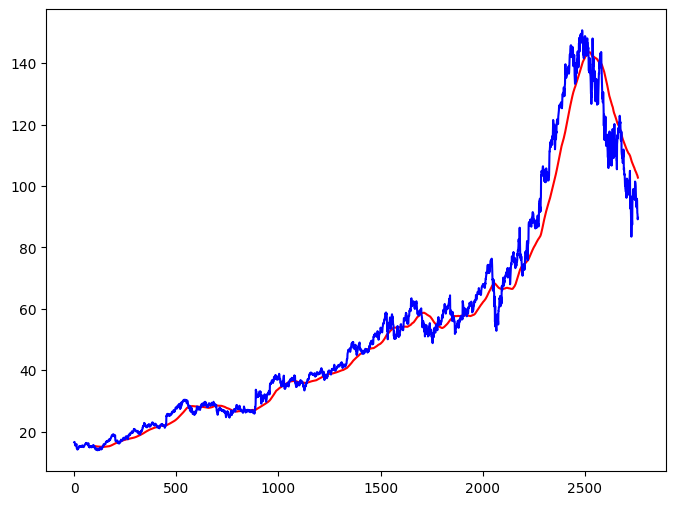

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(Moving_avg_100,'r')
plt.plot(data.Close,'b')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2761 non-null   datetime64[ns]
 1   Open       2761 non-null   float64       
 2   High       2761 non-null   float64       
 3   Low        2761 non-null   float64       
 4   Close      2761 non-null   float64       
 5   Adj Close  2761 non-null   float64       
 6   Volume     2761 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 151.1 KB


In [ ]:
train_data=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
test_data=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [ ]:
train_data.shape

(2208, 1)

In [ ]:
test_data.shape

(553, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale=scaler.fit_transform(train_data)

In [ ]:
data_train_scale.shape

(2208, 1)

In [ ]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [ ]:
x,y=np.array(x),np.array(y)

In [ ]:
data_train_scale[1,0]

0.03753006760291974

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(
    units=50,activation='relu',return_sequences=True,
    input_shape=((x.shape[1],1))
))

model.add(Dropout(0.2))
model.add(
    LSTM(
      units=60, activation='relu', return_sequences=True
    )
)

model.add(Dropout(0.3))

model.add(
    LSTM(
      units=80, activation='relu', return_sequences=True
    )
)

model.add(Dropout(0.4))

model.add(
    LSTM(
      units=120, activation='relu'
    )
)

model.add(Dropout(0.5))

model.add(Dense(units=1)
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(
    optimizer='adam',loss='mean_squared_error'
)

In [ ]:
history=model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
66/66 [==============================] - 25s 288ms/step - loss: 0.0276
Epoch 2/50
66/66 [==============================] - 22s 338ms/step - loss: 0.0072
Epoch 3/50
66/66 [==============================] - 19s 289ms/step - loss: 0.0053
Epoch 4/50
66/66 [==============================] - 20s 304ms/step - loss: 0.0055
Epoch 5/50
66/66 [==============================] - 19s 290ms/step - loss: 0.0053
Epoch 6/50
66/66 [==============================] - 19s 286ms/step - loss: 0.0051
Epoch 7/50
66/66 [==============================] - 21s 318ms/step - loss: 0.0040
Epoch 8/50
66/66 [==============================] - 19s 293ms/step - loss: 0.0040
Epoch 9/50
66/66 [==============================] - 21s 320ms/step - loss: 0.0041
Epoch 10/50
66/66 [==============================] - 19s 293ms/step - loss: 0.0039
Epoch 11/50
66/66 [==============================] - 20s 311ms/step - loss: 0.0040
Epoch 12/50
66/66 [==============================] - 21s 317ms/step - loss: 0.0037
Epoch 13/50
6

In [ ]:
model.save('/content/drive/MyDrive/Trained_models/stockModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
model_path='/content/drive/MyDrive/Trained_models/stockModel.h5';
loaded_model=tf.keras.models.load_model(model_path)

In [ ]:
past_100_days=train_data.tail(100)

In [ ]:
past_100_days

,Close
2108,70.335999
2109,70.139999
2110,70.521004
2111,70.850998
2112,70.891998
...,...
2203,74.301003
2204,72.671997
2205,73.014503
2206,74.296501


In [ ]:
test_data=pd.concat([past_100_days,test_data],ignore_index=True)

In [ ]:
test_data

,Close
0,70.335999
1,70.139999
2,70.521004
3,70.850998
4,70.891998
...,...
648,95.309998
649,91.199997
650,90.860001
651,89.150002


In [ ]:
data_test_scale=scaler.fit_transform(test_data)

In [ ]:
x=[]
y=[]

for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [ ]:
y_pred=loaded_model.predict(x)

18/18 [==============================] - 5s 181ms/step


In [ ]:
scale=1/scaler.scale_

In [ ]:
y_pred=y_pred*scale

In [ ]:
y_pred

array([[ 8.40821547],
       [ 8.55523712],
       [ 8.72923403],
       [ 8.9351881 ],
       [ 9.17636308],
       [ 9.45287482],
       [ 9.75353684],
       [10.06810432],
       [10.39196142],
       [10.73000499],
       [11.09198561],
       [11.47699984],
       [11.87735789],
       [12.26799864],
       [12.6259045 ],
       [12.94553523],
       [13.23417388],
       [13.50646666],
       [13.7905437 ],
       [14.1172196 ],
       [14.50607934],
       [14.96008099],
       [15.4610077 ],
       [15.99344046],
       [16.54331359],
       [17.10038595],
       [17.65330097],
       [18.19012279],
       [18.69904989],
       [19.16696316],
       [19.58161984],
       [19.93343699],
       [20.21842117],
       [20.43609787],
       [20.59249542],
       [20.69323541],
       [20.75467233],
       [20.80139278],
       [20.85630466],
       [20.93894857],
       [21.06040746],
       [21.22502232],
       [21.43346857],
       [21.68176513],
       [21.96160225],
       [22

In [ ]:
y=y*scale

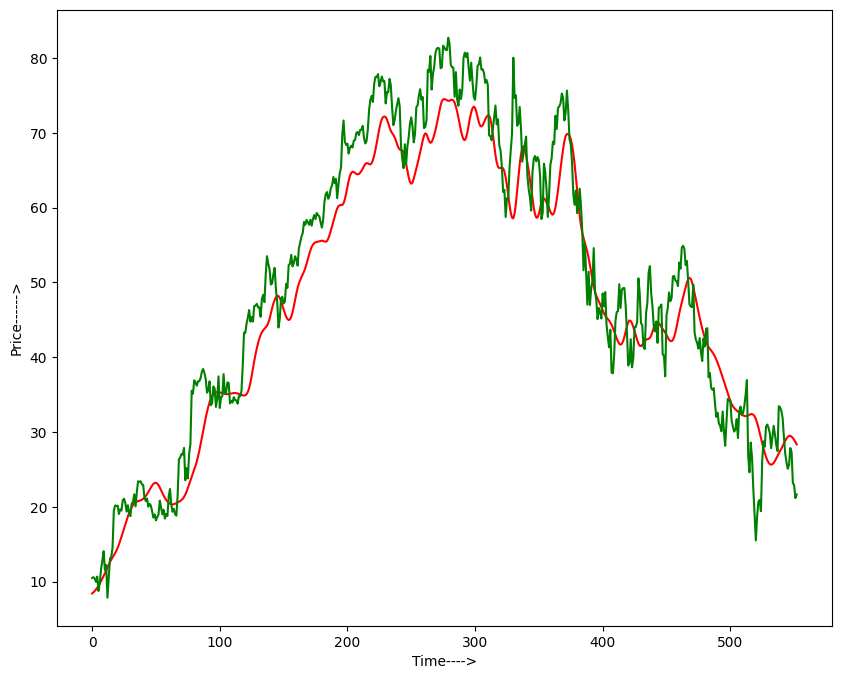

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_pred,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time---->')
plt.ylabel('Price------>')
plt.show()

In [ ]:
loaded_model.save('Stock_Price_pred.keras')

2.15.0


2.15.0
